In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [3]:
df = pd.read_csv('news.csv')
print(df.shape)
df.head(10)

(6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [4]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [6]:
labels = df.label
labels.head(15)

0     FAKE
1     FAKE
2     REAL
3     FAKE
4     REAL
5     FAKE
6     FAKE
7     REAL
8     REAL
9     REAL
10    REAL
11    REAL
12    FAKE
13    FAKE
14    REAL
Name: label, dtype: object

In [7]:
# Check for missing values
missing_values = df.isnull().sum()

missing_values_count = missing_values[missing_values > 0]
total_missing_values = missing_values_count.sum()

missing_values_count, total_missing_values

(Series([], dtype: int64), 0)

In [8]:
# Print the count of each class
class_counts = df['label'].value_counts()
print(class_counts)

label
REAL    3171
FAKE    3164
Name: count, dtype: int64


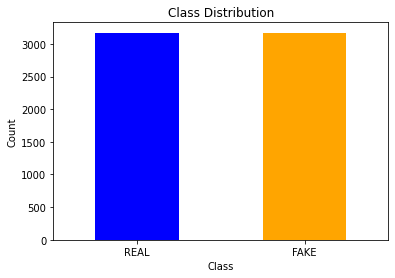

In [9]:
# Plot bar chart
class_counts.plot(kind='bar', rot=0, color=['blue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

#### This shows that classes are balanced, thus do not require oversampling or undersampling

In [10]:
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=42)

In [11]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(x_train)
tfidf_test=tfidf_vectorizer.transform(x_test)

In [22]:
# Passive Aggressive Classifier
pac = PassiveAggressiveClassifier()

# Parameter grid for grid search
param_grid_pac = {
    'max_iter': [50, 100],
    'C': [0.1, 1, 10],
    'tol': [1e-3, 1e-4]
}

# Grid search
grid_search_pac = GridSearchCV(pac, param_grid_pac, cv=5, n_jobs=-1)
grid_search_pac.fit(tfidf_train, y_train)

# Print best parameters and corresponding accuracy
print(f"Passive Aggressive Classifier - Best Parameters: {grid_search_pac.best_params_}")
y_pred_pac = grid_search_pac.predict(tfidf_test)

# Calculate accuracy
accuracy_pac = accuracy_score(y_test, y_pred_pac)
print(f'Accuracy: {round(accuracy_pac * 100, 2)}%')

# Print confusion matrix
conf_matrix_pac = confusion_matrix(y_test, y_pred_pac, labels=['FAKE', 'REAL'])
print(conf_matrix_pac)

# Calculate F1 score
f1_pac = f1_score(y_test, y_pred_pac, pos_label='FAKE')  # Assuming 'FAKE' is the positive class
print(f'F1 Score: {round(f1_pac, 2)}')

Passive Aggressive Classifier - Best Parameters: {'C': 1, 'max_iter': 50, 'tol': 0.0001}
Accuracy: 93.61%
[[588  40]
 [ 41 598]]
F1 Score: 0.94


In [23]:
# Random Forest Classifier
rfc = RandomForestClassifier()

# Parameter grid for grid search
param_grid_rfc = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search
grid_search_rfc = GridSearchCV(rfc, param_grid_rfc, cv=5, n_jobs=-1)
grid_search_rfc.fit(tfidf_train, y_train)

# Print best parameters and corresponding accuracy
print(f"Random Forest Classifier - Best Parameters: {grid_search_rfc.best_params_}")
y_pred_rfc = grid_search_rfc.predict(tfidf_test)

# Calculate accuracy
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print(f'Accuracy: {round(accuracy_rfc * 100, 2)}%')

# Print confusion matrix
conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc, labels=['FAKE', 'REAL'])
print(conf_matrix_rfc)

# Calculate F1 score
f1_rfc = f1_score(y_test, y_pred_rfc, pos_label='FAKE')  # Assuming 'FAKE' is the positive class
print(f'F1 Score: {round(f1_rfc, 2)}')


Random Forest Classifier - Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 91.08%
[[562  66]
 [ 47 592]]
F1 Score: 0.91
